## Import files

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
# import data
train_data = pd.read_csv("train.csv", index_col='id')
test_features = pd.read_csv("test.csv", index_col='id')

# features & labels
train_labels = train_data[['time']]
train_features = train_data.drop(columns=['time'])


print("Training data shape: {}".format(train_data.shape))
print("Testing features shape: {}".format(test_features.shape))
display(train_data.head())
train_data.describe()

Training data shape: (400, 14)
Testing features shape: (100, 13)


,penalty,l1_ratio,alpha,max_iter,random_state,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,time
id,,,,,,,,,,,,,,
0,none,0.304083,0.0001,417,475,-1,1089,327,4,3,7,0.074798,24.242009,0.409987
1,l1,0.727744,0.0010,578,569,1,790,373,4,5,7,0.077781,54.626302,3.950953
2,none,0.745885,0.0100,588,529,2,428,1198,2,5,6,0.030196,17.999964,0.368702
3,none,0.474605,0.0010,829,103,4,877,313,6,5,7,0.057261,82.257222,1.004559
4,elasticnet,0.395049,0.0010,167,418,2,216,644,8,5,11,0.073728,95.515601,0.802800


,l1_ratio,alpha,max_iter,random_state,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,time
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.502687,0.003725,555.510000,489.21000,2.810000,756.210000,766.145000,5.855000,3.457500,8.675000,0.048519,50.339018,3.202330
std,0.232231,0.004475,265.000042,287.45622,2.951386,373.326402,375.214116,2.492892,1.100555,1.521566,0.030369,28.992873,5.265786
min,0.100356,0.000100,103.000000,0.00000,-1.000000,100.000000,110.000000,2.000000,2.000000,5.000000,0.000047,1.527627,0.075342
25%,0.299859,0.000100,333.250000,232.25000,1.000000,451.500000,439.750000,4.000000,3.000000,8.000000,0.020567,25.230494,0.504478
50%,0.491566,0.001000,532.000000,499.00000,2.000000,748.000000,774.000000,6.000000,3.000000,9.000000,0.046995,51.629863,1.405072
75%,0.704260,0.010000,787.250000,728.00000,4.000000,1065.750000,1088.500000,8.000000,4.000000,10.000000,0.074997,74.948272,3.628776
max,0.895220,0.010000,998.000000,1000.00000,8.000000,1397.000000,1397.000000,10.000000,5.000000,12.000000,0.099866,99.748437,41.099969


## Features engineering

### Features Scaling

#### time

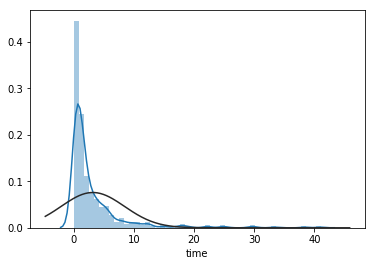

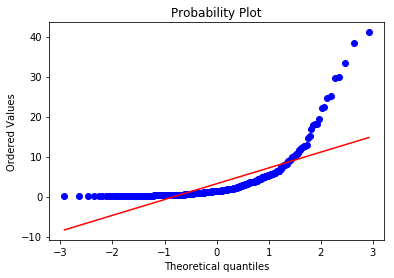

In [4]:
from scipy.stats import norm
from scipy import stats

#histogram and normal probability plot
sns.distplot(train_labels['time'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_labels['time'], plot=plt)

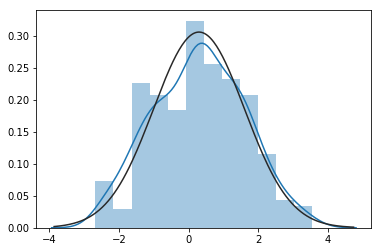

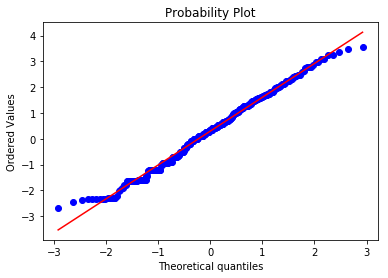

In [5]:
# Box-cox Transfer
from sklearn.preprocessing import PowerTransformer
labels_bc_transformer = PowerTransformer(method='box-cox', standardize=False)
labels_bc = labels_bc_transformer.fit_transform(train_labels[['time']])
labels_bc_df = pd.DataFrame(labels_bc, columns=['time'])

sns.distplot(labels_bc, fit=norm);
fig = plt.figure()
res = stats.probplot(labels_bc.ravel(), plot=plt)

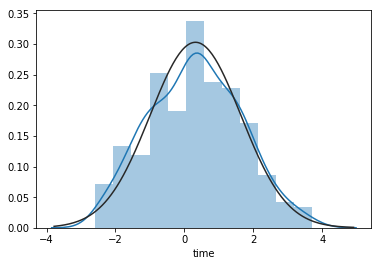

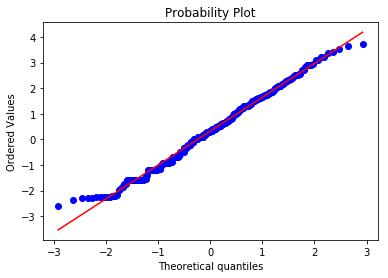

In [6]:
#applying log transformation
labels_log = np.log(train_labels['time'])
labels_log_df = pd.DataFrame(labels_log, columns=['time'])

#transformed histogram and normal probability plot
sns.distplot(labels_log, fit=norm);
fig = plt.figure()
res = stats.probplot(labels_log, plot=plt)

### One-hot

In [8]:
train_dummies_df = pd.get_dummies(train_features)
test_dummies_df = pd.get_dummies(test_features)

train_dummies_df = train_dummies_df.drop(['random_state'], axis=1)
test_dummies_df = test_dummies_df.drop(['random_state'], axis=1)

display(train_dummies_df.head())
display(test_dummies_df.head())

,l1_ratio,alpha,max_iter,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,penalty_elasticnet,penalty_l1,penalty_l2,penalty_none
id,,,,,,,,,,,,,,,
0,0.304083,0.0001,417,-1,1089,327,4,3,7,0.074798,24.242009,0,0,0,1
1,0.727744,0.0010,578,1,790,373,4,5,7,0.077781,54.626302,0,1,0,0
2,0.745885,0.0100,588,2,428,1198,2,5,6,0.030196,17.999964,0,0,0,1
3,0.474605,0.0010,829,4,877,313,6,5,7,0.057261,82.257222,0,0,0,1
4,0.395049,0.0010,167,2,216,644,8,5,11,0.073728,95.515601,1,0,0,0


,l1_ratio,alpha,max_iter,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,penalty_elasticnet,penalty_l1,penalty_l2,penalty_none
id,,,,,,,,,,,,,,,
0,0.690384,0.001,602,4,1376,1078,3,4,8,0.049072,40.832757,0,0,1,0
1,0.215088,0.001,522,4,598,1528,10,3,11,0.041393,68.611537,1,0,0,0
2,0.217458,0.001,398,16,553,1008,8,5,8,0.005987,61.713892,0,0,1,0
3,0.120303,0.001,439,16,1977,1319,3,4,10,0.002964,58.631194,0,0,0,1
4,0.458851,0.010,278,4,1826,1530,7,5,8,0.050126,87.315374,0,0,0,1


### Drop Features

In [9]:
train_features_cleaned = train_features.drop(['random_state'], axis=1)
test_features_cleaned = test_features.drop(['random_state'], axis=1)


### penalty & l1_ratio

Change the penalty & l1_ratio into feature 'l1'(L1 Regularization Ratio) and 'l2' (L2 Regularization).

In [15]:
train_features_reg = train_features_cleaned.copy()
test_features_reg = test_features_cleaned.copy()

def transReg(data_df):
    data_df['l1'] = pd.Series(.0, index=data_df.index)
    data_df['l2'] = pd.Series(.0, index=data_df.index)
    data_df.head()
    
    for i in data_df.index:
        penalty_value = data_df.at[i, 'penalty']
        if penalty_value == 'l1':
            data_df.at[i, 'l1'] = 1
        elif penalty_value == 'l2':
            data_df.at[i, 'l2'] = 1
        elif penalty_value == 'elasticnet':
            data_df.at[i, 'l1'] = data_df.at[i, 'l1_ratio']
#             data_df.at[i, 'l2'] = 1- data_df.at[i, 'l1_ratio']        
            data_df.at[i, 'l2'] = 0.1
    
    data_df = data_df.drop(['penalty', 'l1_ratio'], axis=1)
    return data_df

train_features_reg = transReg(train_features_reg)
test_features_reg = transReg(test_features_reg)
display(test_features_reg.head())

,alpha,max_iter,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,l1,l2
id,,,,,,,,,,,,
0,0.001,602,4,1376,1078,3,4,8,0.049072,40.832757,0.000000,1.0
1,0.001,522,4,598,1528,10,3,11,0.041393,68.611537,0.215088,0.1
2,0.001,398,16,553,1008,8,5,8,0.005987,61.713892,0.000000,1.0
3,0.001,439,16,1977,1319,3,4,10,0.002964,58.631194,0.000000,0.0
4,0.010,278,4,1826,1530,7,5,8,0.050126,87.315374,0.000000,0.0


### n_jobs

change the n_jobs with value -1 to 16

In [16]:
train_features_n_jobs = train_features_reg.copy()
train_features_n_jobs.n_jobs = train_features_n_jobs.n_jobs.apply(lambda x: 16 if x == -1 else x)
# train_features_n_jobs.n_jobs = train_features_n_jobs.n_jobs.apply(lambda x: np.log(x))

test_features_n_jobs = test_features_reg.copy()
test_features_n_jobs.n_jobs = test_features_n_jobs.n_jobs.apply(lambda x: 16 if x == -1 else x)
# test_features_n_jobs.n_jobs = test_features_n_jobs.n_jobs.apply(lambda x: np.log(x))


### Scale

Apply Log-Transformation to 'scale'

In [17]:
train_features_scale = train_features_n_jobs.copy()
train_features_scale.scale = train_features_scale.scale.apply(lambda x: np.log(x))

test_features_scale = test_features_n_jobs.copy()
test_features_scale.scale = test_features_scale.scale.apply(lambda x: np.log(x))


### Alpha

Apply log-transformation to 'alpha'

In [18]:
train_features_alpha = train_features_scale.copy()
train_features_alpha.alpha = train_features_alpha.alpha.apply(lambda x: np.log(x))

test_features_alpha = test_features_scale.copy()
test_features_alpha.alpha = test_features_alpha.alpha.apply(lambda x: np.log(x))


### Correlation Matrix

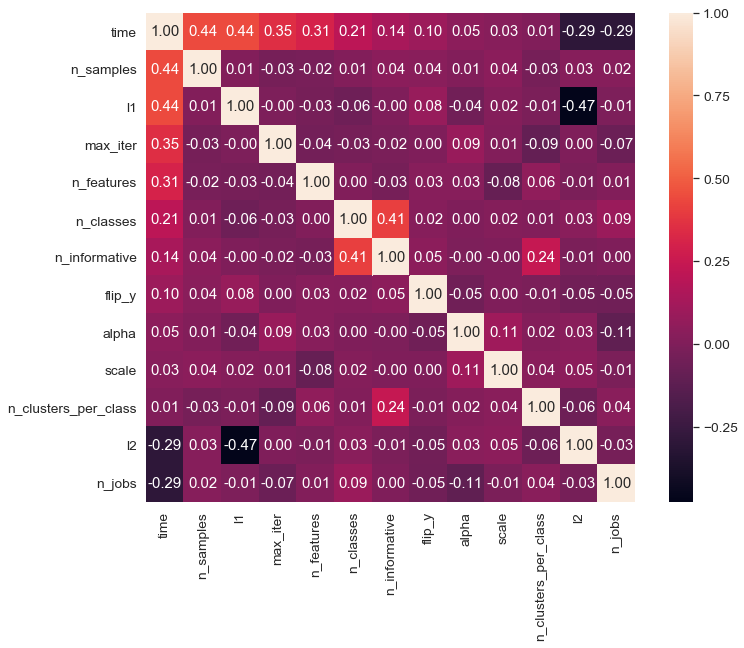

In [19]:
#correlation matrix

corr_df = pd.concat([labels_log_df, train_features_alpha], axis=1)
corrmat = corr_df.corr()
k = len(corr_df.columns) #number of variables for heatmap
cols = corrmat.nlargest(k, 'time')['time'].index
cm = np.corrcoef(corr_df[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Features Selection

In [20]:
train_features_sel = train_features_alpha.copy()
test_features_sel = test_features_alpha.copy()

# train_features_sel = train_features_sel.drop(['flip_y'], axis=1)
# test_features_sel = test_features_sel.drop(['flip_y'], axis=1)


## Prediction

In [23]:
# Box-Cox Transformer
def write_predictions(pred):
    preds = np.reshape(np.ravel(pred), (len(pred), 1))
    preds_origin = labels_bc_transformer.inverse_transform(preds)
    pred_df = pd.DataFrame(preds_origin, columns=['time'])
    pred_df.index.name = 'Id'
    pred_df['time'] = pred_df['time'].apply(lambda x: 0 if x < 0 else x)
    pred_df = pred_df.round({'time': 2})
    display(pred_df)
    pred_df.to_csv('final_predictions.csv')

# Log Transformer
# def write_predictions(pred):
#     pred_origin = np.exp(pred)
#     pred_origin = np.reshape(np.ravel(pred_origin), (len(pred_origin), 1))
#     pred_df = pd.DataFrame(pred_origin, columns=['time'])
#     pred_df.index.name = 'Id'
#     pred_df['time'] = pred_df['time'].apply(lambda x: 0 if x < 0 else x)
#     pred_df = pred_df.round({'time': 2})
#     display(pred_df)
#     pred_df.to_csv('new_predictions.csv')

In [45]:
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=66).get_n_splits(X_train.values)
    mse = -cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf)
    rmse= np.sqrt(mse)
    
    print("{}: {:.4f}, ({:.4f}) {:.4f}\n".format(
        model.__class__.__name__,
        rmse.mean(),
        rmse.std(),
        mse.mean()))
    
    return(rmse)

## Transfer Learning

In [36]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [37]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
import time


### Data Generation

In [39]:
def generate_data(data, n=1):
    time_df = pd.DataFrame(index=data.index)

    # Make n prediction time for each row
    for pred_index in range(n):
        round_time_start = time.time()
        
        print("==================Round {}======================".format(pred_index))
        pred_col_name = "prediction{}".format(pred_index)
        time_df[pred_col_name] = pd.Series(.0, index=time_df.index)
        
        # enumerate the data
        for i in data.index:
            print("{} ".format(i), end='')
            # make_classification params
            n_samples = data.at[i, 'n_samples']
            n_features = data.at[i, 'n_features']
            n_classes = data.at[i, 'n_classes']
            n_clusters_per_class = data.at[i, 'n_clusters_per_class']
            n_informative = data.at[i, 'n_informative']
            flip_y = data.at[i, 'flip_y']
            scale = data.at[i, 'scale']
            random_state = data.at[i, 'random_state']

            # SGDClassifier params
            penalty = data.at[i, 'penalty']
            l1_ratio = data.at[i, 'l1_ratio']
            alpha = data.at[i, 'alpha']
            max_iter = data.at[i, 'max_iter']
            n_jobs = data.at[i, 'n_jobs']

            # generate data
            X, Y = make_classification(
                n_samples=n_samples,
                n_features=n_features,
                n_classes=n_classes,
                n_clusters_per_class=n_clusters_per_class,
                n_informative=n_informative,
                flip_y=flip_y,
                scale=scale,
                random_state=random_state)

            # SGDClassifier prediction time
            clf = SGDClassifier(penalty=penalty,
                                l1_ratio=l1_ratio,
                                alpha=alpha,
                                max_iter=max_iter,
                                n_jobs=n_jobs)
            start = time.time()
            clf.fit(X, Y)
            end = time.time()
            sgd_train_time = end - start
            
            # store in dataframe
            time_df.at[i, pred_col_name] = sgd_train_time
            
        round_time_end = time.time()
        round_time = round_time_end - round_time_start
        print("\nRound time: {}".format(round_time))
            
    return time_df
            

**Kindly note that the data generation process may take a long time. It will take about 20+ minutes for each iteration. I have generated 16 iterations of data and finally take the mean value of the time.**

Since the data is generated and stored in the file named 'transfer_data.csv', I will directly read the file so I have commented the following data generation code.

In [451]:
# The following code is for data generation
# features_data = pd.concat([train_features, test_features], axis=0, ignore_index=True)
# transfer_data = generate_data(features_data, n=16)
# transfer_data


==================Round 0======================
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 26

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

,prediction0,prediction1,prediction2,prediction3,prediction4,prediction5,prediction6,prediction7,prediction8,prediction9,prediction10,prediction11,prediction12,prediction13,prediction14,prediction15
0,0.308241,0.304206,0.326860,0.316661,0.318634,0.318695,0.315213,0.330887,0.308841,0.325574,0.315855,0.317036,0.318886,0.313861,0.315398,0.305694
1,3.791194,3.281402,3.381291,3.412887,3.329683,3.326272,3.421897,3.419041,3.352788,3.453472,3.357830,3.343630,3.388895,3.426919,3.338472,3.325530
2,0.365374,0.344317,0.345571,0.342077,0.342010,0.342300,0.356238,0.343166,0.341542,0.342960,0.343745,0.342917,0.365202,0.341776,0.341464,0.344297
3,0.821707,0.741794,0.726039,0.825714,0.734734,0.754696,0.836931,0.839276,0.727522,0.836347,0.739922,0.737676,0.844964,0.732683,0.742227,0.838553
4,0.714076,0.623582,0.643936,0.624452,0.628383,0.622604,0.631958,0.628139,0.635733,0.636133,0.642392,0.637846,0.634260,0.620368,0.634782,0.637370
5,8.075782,7.488250,7.402708,7.566838,7.690633,7.767422,7.811828,8.016170,7.944962,7.724657,7.369440,7.393982,7.940161,7.170833,7.672021,8.188454
6,2.051346,2.119273,2.012252,2.017353,2.019888,2.024227,2.031790,2.018527,2.032129,2.018082,2.023647,2.011441,2.017282,2.096481,2.006005,2.029527
7,3.391421,3.345460,3.250181,3.163520,3.246838,3.263222,3.266934,3.124421,3.155166,3.364173,3.263777,3.359566,3.234452,3.149253,3.262519,3.254437
8,1.053977,0.909954,0.910321,0.951955,0.868252,1.035620,0.933633,0.868019,0.879631,0.884460,0.926455,1.091818,0.973731,0.931057,0.990219,0.912894
9,1.539640,1.470670,1.479257,1.480579,1.475275,1.490400,1.472217,1.473515,1.473649,1.478548,1.470531,1.487325,1.476471,1.485628,1.472644,1.491143


In [42]:
# read the generation data
transfer_data = pd.read_csv('transfer_data.csv', index_col=0)
transfer_data.head()

,prediction0,prediction1,prediction2,prediction3,prediction4,prediction5,prediction6,prediction7,prediction8,prediction9,prediction10,prediction11,prediction12,prediction13,prediction14,prediction15
0,0.308241,0.304206,0.326860,0.316661,0.318634,0.318695,0.315213,0.330887,0.308841,0.325574,0.315855,0.317036,0.318886,0.313861,0.315398,0.305694
1,3.791194,3.281402,3.381291,3.412887,3.329683,3.326272,3.421897,3.419041,3.352788,3.453472,3.357830,3.343630,3.388895,3.426919,3.338472,3.325530
2,0.365374,0.344317,0.345571,0.342077,0.342010,0.342300,0.356238,0.343166,0.341542,0.342960,0.343745,0.342917,0.365202,0.341776,0.341464,0.344297
3,0.821707,0.741794,0.726039,0.825714,0.734734,0.754696,0.836931,0.839276,0.727522,0.836347,0.739922,0.737676,0.844964,0.732683,0.742227,0.838553
4,0.714076,0.623582,0.643936,0.624452,0.628383,0.622604,0.631958,0.628139,0.635733,0.636133,0.642392,0.637846,0.634260,0.620368,0.634782,0.637370


### Make Predictions

In [47]:
def write_predictions_transfer(data_df):
    preds = np.reshape(np.ravel(data_df), (len(data_df), 1))
    pred_df = pd.DataFrame(preds, columns=['time'])
    pred_df.index.name = 'Id'
    pred_df['time'] = pred_df['time'].apply(lambda x: 0 if x < 0 else x)
    pred_df = pred_df.round({'time': 2})
    display(pred_df)
    pred_df.to_csv('final_predictions.csv')

In [44]:
transfer_data_mean = transfer_data.copy()
transfer_data_mean['mean'] = transfer_data_mean.mean(axis=1)
transfer_data_mean = transfer_data_mean[['mean']]
transfer_data_mean


,mean
0,0.316284
1,3.396950
2,0.346560
3,0.780049
4,0.637251
5,7.701509
6,2.033078
7,3.255959
8,0.945125
9,1.482343


In [46]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=1000000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

# combine the time & features
X_train = transfer_data_mean[:len(train_data)]
X_test = transfer_data_mean[len(train_data):].reset_index()
X_test = X_test.drop(['index'], axis=1)
y_train = labels_bc

X_train = pd.concat([X_train, train_features_sel], axis=1)
X_test = pd.concat([X_test, test_features_sel], axis=1)

# X_train
# X_test
xgb_pipeline = make_pipeline(StandardScaler(), model_xgb)
rmsle_cv(xgb_pipeline)


Pipeline: 0.1809, (0.0171) 0.0330



array([0.1495783 , 0.2011743 , 0.18341235, 0.18900626, 0.18109886])

In [48]:
xgb_pipeline.fit(X_train, y_train)
transfer_pred = xgb_pipeline.predict(X_test)
write_predictions(transfer_pred)

,time
Id,
0,1.26
1,9.14
2,0.34
3,1.29
4,2.10
5,8.19
6,2.53
7,0.50
8,14.48
